In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline
import wbgapi as wb
import matplotlib.patches as patches

In [3]:
url1 = "https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/HorizontalBarPlot1.dta"

data1 = pd.read_stata(url1)
data1


,id,tottime,location_type,study,facilitycode,hours
0,1.0,235.0,2,Vietnam District,V1,3.916667
1,2.0,232.0,2,Vietnam District,V2,3.866667
2,3.0,240.0,2,Vietnam District,V3,4.000000
3,4.0,87.0,2,Vietnam District,V4,1.450000
4,5.0,106.0,2,Vietnam District,V5,1.766667
...,...,...,...,...,...,...
380,381.0,22.0,1,Vietnam Commune,V381,0.366667
381,382.0,238.0,2,Vietnam District,V382,3.966667
382,383.0,165.0,2,Vietnam District,V383,2.750000
383,384.0,199.0,1,Vietnam Commune,V384,3.316667


In [15]:
data2 = pd.read_stata("https://github.com/worldbank/r-econ-visual-library/raw/master/Library/Data/HorizontalBarPlot2.dta")
data2


,facilitycode,tottime,study
0,BI_3503001,41.000000,"Birbhum, India"
1,BI_3503002,18.000000,"Birbhum, India"
2,BI_3503004,55.000000,"Birbhum, India"
3,BI_3503005,16.000000,"Birbhum, India"
4,BI_3503006,52.000000,"Birbhum, India"
...,...,...,...
569,MA_93,9.016666,"""Madhya Pradesh, India"" ""(Public Clinics)"""
570,MA_94,34.366665,"""Madhya Pradesh, India"" ""(Public Clinics)"""
571,MA_95,14.500000,"""Madhya Pradesh, India"" ""(Public Clinics)"""
572,MA_97,75.683334,"""Madhya Pradesh, India"" ""(Public Clinics)"""


In [11]:
data = pd.concat([data2, data1], axis=0)
data

,facilitycode,tottime,study,id,location_type,hours
0,BI_3503001,41.0,"Birbhum, India",NaN,NaN,NaN
1,BI_3503002,18.0,"Birbhum, India",NaN,NaN,NaN
2,BI_3503004,55.0,"Birbhum, India",NaN,NaN,NaN
3,BI_3503005,16.0,"Birbhum, India",NaN,NaN,NaN
4,BI_3503006,52.0,"Birbhum, India",NaN,NaN,NaN
...,...,...,...,...,...,...
380,V381,22.0,Vietnam Commune,381.0,1.0,0.366667
381,V382,238.0,Vietnam District,382.0,2.0,3.966667
382,V383,165.0,Vietnam District,383.0,2.0,2.750000
383,V384,199.0,Vietnam Commune,384.0,1.0,3.316667


In [18]:
data4= (data1
       .groupby(['study'])
       .agg({'study':'first','hours':'mean'}))

data4

,study,hours
study,,
Vietnam Commune,Vietnam Commune,1.101324
Vietnam District,Vietnam District,2.831676


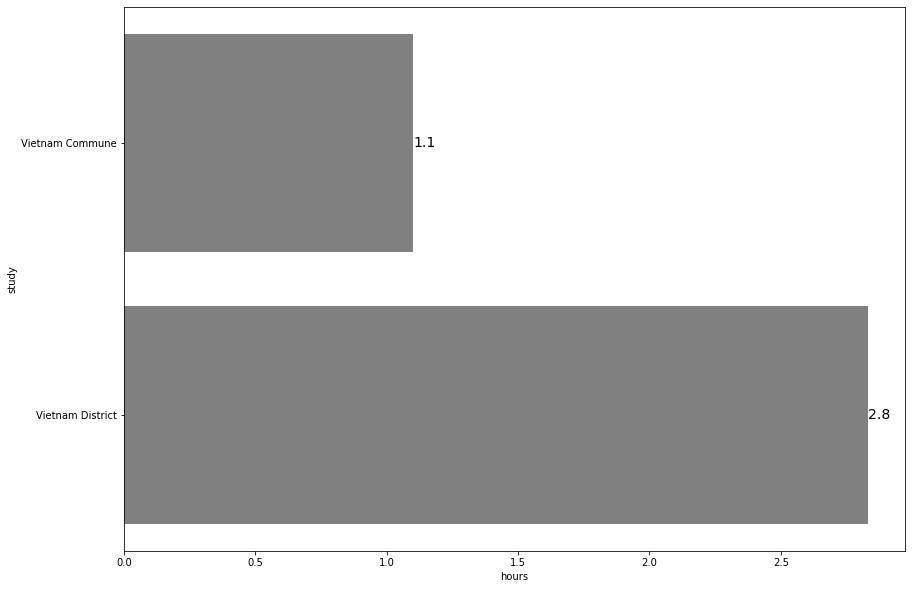

In [33]:
plt.figure(figsize=(14,10))

ax = sns.barplot(data = data4, x = 'hours', y = 'study', color = 'grey')

plt.bar_label(ax.containers[0], fmt='%.1f', fontsize = 14)

plt.show()
